In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import re

In [3]:
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-26/boston_cocktails.csv"
df = pd.read_csv(url)
original_data = df.copy()
df

,name,category,row_id,ingredient_number,ingredient,measure
0,Gauguin,Cocktail Classics,1,1,Light Rum,2 oz
1,Gauguin,Cocktail Classics,1,2,Passion Fruit Syrup,1 oz
2,Gauguin,Cocktail Classics,1,3,Lemon Juice,1 oz
3,Gauguin,Cocktail Classics,1,4,Lime Juice,1 oz
4,Fort Lauderdale,Cocktail Classics,2,1,Light Rum,1 1/2 oz
...,...,...,...,...,...,...
3638,Vow Of Silence,Gin,990,2,Grapefruit Juice,3/4 oz
3639,Vow Of Silence,Gin,990,3,Fresh Lime Juice,1/2 oz
3640,Vow Of Silence,Gin,990,4,Yellow Chartreuse,1/2 oz
3641,Vow Of Silence,Gin,990,5,Amaro,1/4 oz


In [4]:
df.shape[1]

6

In [5]:
namegroup = df.groupby('name')
namegroup.sum()


,row_id,ingredient_number
name,,
1626,2165,15
19th Century,1724,10
A. J.,1314,3
Absinthe Cocktail,1744,10
Absinthe Drip Cocktail,1322,3
...,...,...
Yokahama Romance,3876,10
Yolanda,70,15
Zaza Cocktail,1190,3


In [6]:
# Group by 'name' and 'category' and count the rows in each group
grouped = df.groupby(['name', 'category']).size()

# Calculate the average number of ingredients per drink
average_ingredients_per_drink = grouped.mean()

print(average_ingredients_per_drink)

3.6835187057633973


In [7]:
# Group by 'category' and count the rows in each group
grouped_by_category = df.groupby('category').apply(lambda x: x.groupby('name').size().mean())

print(grouped_by_category)

category
Brandy                   3.595745
Cocktail Classics        3.340471
Cordials and Liqueurs    3.000000
Gin                      3.941176
Non-alcoholic Drinks     3.000000
Rum                      4.000000
Rum - Daiquiris          3.936937
Shooters                 3.000000
Tequila                  4.264368
Vodka                    3.949275
Whiskies                 4.154545
dtype: float64


In [8]:
# df['ingredient'].nunique()
# for i in df['ingredient'].unique():
#     if 'gin' in i:
#         print(i)
# def ingredient_count(name):
#     # Filter ingredients containing the name (case-insensitive)
#     liquor_ingredient = [ingredient for ingredient in df['ingredient'] if name.lower() in ingredient.lower()]
    
#     # Count occurrences of each ingredient
#     ingredient_counter = Counter(liquor_ingredient)

#     # Create a string to display the count of each ingredient
#     ingredient_count_str = '\n'.join([f"{ingredient}: {count}" for ingredient, count in ingredient_counter.items()])

#     return ingredient_count_str

# def uniqueCount_ingredientCount(name):
#     print(f"Count of unique {name} ingredients: {len([gin for gin in df['ingredient'].unique() if name.lower() in gin.lower()])}")
#     print(ingredient_count(name))

# uniqueCount_ingredientCount("gin")

# print("Count of unique gin ingredients: ", len([gin for gin in df['ingredient'].unique() if "gin" in gin.lower()]))
# print(ingredient_count("gin"))

# print("Count of unique gin ingredients: ", len([gin for gin in df['ingredient'].unique() if "gin" in gin.lower()]))
# print(ingredient_count("whiskey"))

# print("Count of unique gin ingredients: ", len([gin for gin in df['ingredient'].unique() if "gin" in gin.lower()]))
# print(ingredient_count("vodka"))

# print("Count of unique gin ingredients: ", len([gin for gin in df['ingredient'].unique() if "gin" in gin.lower()]))
# print(ingredient_count("rum"))

# print("Count of unique gin ingredients: ", len([gin for gin in df['ingredient'].unique() if "gin" in gin.lower()]))
# print(ingredient_count("tequila"))

# print("Count of unique gin ingredients: ", len([gin for gin in df['ingredient'].unique() if "gin" in gin.lower()]))
# print(ingredient_count("brandy"))

In [9]:
def ingredient_count(name):
    # Define a regular expression pattern for word boundary
    pattern = re.compile(rf'\b{name.lower()}\b')

    # Filter ingredients containing the name as a distinct word
    liquor_ingredient = [ingredient for ingredient in df['ingredient'] if pattern.search(ingredient.lower())]

    # Count occurrences of each ingredient
    ingredient_counter = Counter(liquor_ingredient)

    # Create a string to display the count of each ingredient
    ingredient_count_str = '\n'.join([f"{ingredient}: {count}" for ingredient, count in ingredient_counter.items()])

    return ingredient_count_str

def uniqueCount_ingredientCount(name):
    # Define a regular expression pattern for word boundary
    pattern = re.compile(rf'\b{name.lower()}\b')
    unique_count = len([ingredient for ingredient in df['ingredient'].unique() if pattern.search(ingredient.lower())])

    print(f"Count of unique {name} ingredients: {unique_count}")
    print(ingredient_count(name))

uniqueCount_ingredientCount("gin")
print("----------------------------")
uniqueCount_ingredientCount("vodka")
print("----------------------------")
uniqueCount_ingredientCount("whiskey")
print("----------------------------")
uniqueCount_ingredientCount("rum")
print("----------------------------")
uniqueCount_ingredientCount("tequila")
print("----------------------------")
uniqueCount_ingredientCount("brandy")



Count of unique gin ingredients: 13
Gin: 176
Sloe gin: 15
Tanqueray gin: 1
Gin & ginger ale: 2
Dry gin: 1
Mr. Boston Gin: 8
Mint-Flavored Gin: 2
Old Tom gin: 1
Orange Flavored Gin: 1
Old Mr. Boston Dry Gin: 30
Old Mr. Boston Orange Flavored Gin: 5
Old Mr. Boston Sloe Gin: 2
each Light Rum, Gin, Vodka, Blanco tequila, Blue curacao: 1
----------------------------
Count of unique vodka ingredients: 24
Vodka: 114
lemon-flavored vodka: 3
Mango-flavored vodka: 1
Aquavit or vodka: 1
Citrus-flavored vodka: 16
Orange-flavored vodka: 6
Mr. Boston Vodka: 2
Grapefruit-flavored vodka: 2
Cherry Vodka: 2
Peach-flavored vodka: 1
Vanilla-flavored vodka: 1
Black cherry-flavored vodka: 2
Acai berry flavored vodka: 1
each Citrus-flavored vodka and orange-flavored vodka: 1
Lime Vodka: 4
100-proof Vodka: 1
Bison grass vodka (Zubrowka): 1
each Vodka, tequila blanco, triple sec: 1
Old Mr. Boston Vodka: 4
Raspberry-flavored vodka: 1
Pear-flavored vodka: 1
Old Mr. Boston Grape Vodka: 1
Old Mr. Boston 100 proof 

In [10]:
filtered = df[df["category"] == 'Cocktail Classics'] 
filtered['name'].unique()

array(['Gauguin', 'Fort Lauderdale', 'Cuban Cocktail No. 1',
       'Cool Carlos', 'Cherry Rum', 'Casa Blanca', 'Caribbean Champagne',
       'Bacardi Cocktail', 'Apple Pie No. 1', 'Yolanda', 'Yellow Rattler',
       'Why Not?', 'What The Hell', 'Webster Cocktail',
       'Union Jack Cocktail', 'Trinity Cocktail',
       'Three Stripes Cocktail', 'Tanq-A-Rita', 'Tailspin Cocktail',
       'Sweet Patootie Cocktail', 'Sunshine Cocktail',
       'Spring Feeling Cocktail', 'Sphinx Cocktail',
       'Southern Gin Cocktail', 'Society Cocktail', 'Snyder',
       'Smiler Cocktail', 'Smile Cocktail', 'Sand-Martin Cocktail',
       'Roselyn Cocktail', 'Resolute Cocktail', 'Racquet Club Cocktail',
       'Pollyanna Cocktai', 'Plaza Cocktail', 'Nineteenth Hole',
       'Montreal Club Bouncer', 'Monte Carlo Imperial Highball',
       'Melon Cocktail', 'Martini (Medium)', 'Martini (Dry) (5-to-1)',
       "Mamie's Sister", "Maiden's Prayer", 'Lone Tree Cocktail',
       'London Buck', 'Leap Frog High

In [11]:
vodka_sling = df[df['name'] == 'Mai-Tai (Trader Vic Version)']
vodka_sling

,name,category,row_id,ingredient_number,ingredient,measure
3039,Mai-Tai (Trader Vic Version),Rum - Daiquiris,839,1,"Dark rum, preferably Jamaican",2 oz
3040,Mai-Tai (Trader Vic Version),Rum - Daiquiris,839,2,Orange curacao,1/2 oz
3041,Mai-Tai (Trader Vic Version),Rum - Daiquiris,839,3,Fresh lime juice (reserve 1/2 lime shell for g...,1 oz
3042,Mai-Tai (Trader Vic Version),Rum - Daiquiris,839,4,Orgeat Syrup,1/2 oz
3043,Mai-Tai (Trader Vic Version),Rum - Daiquiris,839,5,Rock candy syrup or simple syrup,1/4 oz


In [12]:
unique_names = df['name'].unique()
sorted_names = np.sort(unique_names)
sorted_names

array(['1626', '19th Century', 'A. J.', 'Absinthe Cocktail',
       'Absinthe Drip Cocktail', 'Absinthe Special Cocktail',
       'Academic Review', 'Acapulco', 'Adam and Eve', 'Adderly Cocktail',
       'Admiral Perry', 'Affinity Cocktail', 'Affinity Cocktail (whisky)',
       'After Dinner Cocktail', 'After Supper Cocktail', 'Akogare',
       'Alamo Splash', 'Alexander Cocktail No. 1',
       'Alexander Cocktail No. 2', "Alexander's Sister Cocktail",
       'Alfie Cocktail', 'Algonquin', 'Allegheny', 'Allies Cocktail',
       'Almeria', 'Amante Picante', 'Amaretto And Cream', 'Amaretto Rose',
       'Amaretto Sour', 'Amaretto Stinger', 'Amber Amour', 'Ambrosia',
       'American Trilogy', 'Americana', "Angel's Share", 'Ante',
       'Antoine Special', 'Apple Blow Fizz', 'Apple Pie',
       'Apple Pie Cocktail', 'Apple Pie No. 1', 'Apple Rum Rickey',
       'Applecar', 'Applejack Punch', 'Apricot Anise Collins',
       'Apricot Anisette Collins', 'Apricot Cocktail', 'Apricot Lady',
  

In [13]:
grouped = df.groupby('category')['ingredient'].count()
grouped

category
Brandy                    169
Cocktail Classics        1560
Cordials and Liqueurs      24
Gin                        67
Non-alcoholic Drinks        3
Rum                         4
Rum - Daiquiris           437
Shooters                    6
Tequila                   371
Vodka                     545
Whiskies                  457
Name: ingredient, dtype: int64

In [14]:
df['measure'].unique()

array(['2 oz', '1 oz', '1 1/2 oz', '1/2 oz', '1/4 oz', '3 oz', '1 1/4 oz',
       '3/4 oz', '2 1/2 oz', '5 oz', '1', '1 dash', '1 2/3 oz', '1/3 oz',
       '4 oz', '6', '1 3/4 oz', '1/2 or 1', '2 1/4 oz', '5 or 6', '6 oz',
       'For glass', '1/2 tsp', '24 oz', '1c', '1 tsp', '2 bottles', '2',
       '2 750-ml', '25', '5', '1 750-ml', '3 slices', '16 oz', '6 Fresh',
       '7', '2 -  3 drops', 'splash', '12', '2 dashes', '1  3/4 oz',
       '1 splash'], dtype=object)

In [15]:
def convert_to_ounces(measure):
    # Handle non-numeric cases
    if measure in ['splash', 'dash', 'For glass']:
        return 0.5  # Assigning an arbitrary small value
    if 'bottle' in measure:
        return 25.36  # Assuming one bottle is approximately 750ml or 25.36 oz

    # Extract numeric values
    numbers = re.findall(r'\d+\/\d+|\d+', measure)
    numbers = [eval(num) if '/' in num else float(num) for num in numbers]

    # Handle cases like '1 1/2 oz' -> [1, 1/2]
    total_oz = sum(numbers)

    # Round to 2 decimal places
    total_oz = round(total_oz, 2)
    
    return total_oz

# Example usage
measures = df['measure']

numerical_measures = [convert_to_ounces(m) for m in measures]
numerical_measures


[2.0,
 1.0,
 1.0,
 1.0,
 1.5,
 0.5,
 0.25,
 0.25,
 3.0,
 1.0,
 0.5,
 0.5,
 2.0,
 1.5,
 2.0,
 2.0,
 1.0,
 1.0,
 2.0,
 1.0,
 0.5,
 1.0,
 1.0,
 1.25,
 1.5,
 1.0,
 2.0,
 1.5,
 1.5,
 1.5,
 0.5,
 0.5,
 1.5,
 0.25,
 0.25,
 1.5,
 1.0,
 0.75,
 0.5,
 1.0,
 1.5,
 0.5,
 0.5,
 0.75,
 0.75,
 1.0,
 0.5,
 1.0,
 0.5,
 0.5,
 0.5,
 1.0,
 1.0,
 1.0,
 1.0,
 0.5,
 0.5,
 1.0,
 1.0,
 0.5,
 1.0,
 1.5,
 0.75,
 1.0,
 1.0,
 1.0,
 1.0,
 0.5,
 1.5,
 0.5,
 1.0,
 0.75,
 1.5,
 0.5,
 2.5,
 0.5,
 1.0,
 0.5,
 5.0,
 0.75,
 0.75,
 0.75,
 1.0,
 0.5,
 1.0,
 1.5,
 3.0,
 1.0,
 1.5,
 0.75,
 0.5,
 1.0,
 0.75,
 0.75,
 0.75,
 1.0,
 1.0,
 0.5,
 1.0,
 0.75,
 1.5,
 1.0,
 1.0,
 0.5,
 1.0,
 1.5,
 1.5,
 1.5,
 2.0,
 0.5,
 0.75,
 0.5,
 1.0,
 1.0,
 2.0,
 2.0,
 0.5,
 1.5,
 0.75,
 0.25,
 1.5,
 0.5,
 0.5,
 0.5,
 0.5,
 1.0,
 1.0,
 0.25,
 1.0,
 1.0,
 0.5,
 1.5,
 0.5,
 0.5,
 1.0,
 1.5,
 1.5,
 2.0,
 1.0,
 1.0,
 2.0,
 0.5,
 2.0,
 0.75,
 1.5,
 0.5,
 0.25,
 0.5,
 1.0,
 1.5,
 0.75,
 1.0,
 1.5,
 1.5,
 3.0,
 3.0,
 2.0,
 0.5,
 0.5,
 0.75,
 0.75,
 0.75,


In [16]:
ingredient_dummies = pd.get_dummies(df['ingredient'])

numerical_measures_series = pd.Series(numerical_measures, index=df.index)
ingredient_dummies = ingredient_dummies.mul(numerical_measures_series, axis=0)
ingredient_dummies

,100-proof Vodka,151-Proof Rum,17-year-old J. Wray and Nephew Ltd. Rum,7-Up,Absinthe,Absinthe Substitute,Absinthe or pastis,Acai berry flavored vodka,African rum,Agave nectar,...,orgeat or almond syrup,pineapple,pomegranate molasses (available at Middle Eastern grocers),port,powdered sugar,red wine,springs mint,sweet vermouth,thin Peeled fresh ginger,"tiki bitters, such as Bittermen's Elemakule"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3639,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
dummies = pd.concat([df['name'], ingredient_dummies], axis=1)
dummies = dummies.groupby('name').sum()
dummies

,100-proof Vodka,151-Proof Rum,17-year-old J. Wray and Nephew Ltd. Rum,7-Up,Absinthe,Absinthe Substitute,Absinthe or pastis,Acai berry flavored vodka,African rum,Agave nectar,...,orgeat or almond syrup,pineapple,pomegranate molasses (available at Middle Eastern grocers),port,powdered sugar,red wine,springs mint,sweet vermouth,thin Peeled fresh ginger,"tiki bitters, such as Bittermen's Elemakule"
name,,,,,,,,,,,,,,,,,,,,,
1626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19th Century,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A. J.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Absinthe Cocktail,0.0,0.0,0.0,0.0,0.0,1.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Absinthe Drip Cocktail,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yokahama Romance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Yolanda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zaza Cocktail,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
dummies.to_csv('dummies.csv')

In [19]:
rows_to_drop = ['Chi-Town Flip', 'Frankenjack Cocktail', 'Tailspin Cocktail']
dummies = dummies.drop(rows_to_drop, errors='ignore')

In [20]:
rowToCheck = dummies.loc['1626']
rowToCheck[rowToCheck > 0]

Angostura Bitters           2.00
Bourbon whiskey             2.50
Gingerbread liqueur         0.75
Italian preserved cherry    1.00
cherry-flavored brandy      0.50
Name: 1626, dtype: float64

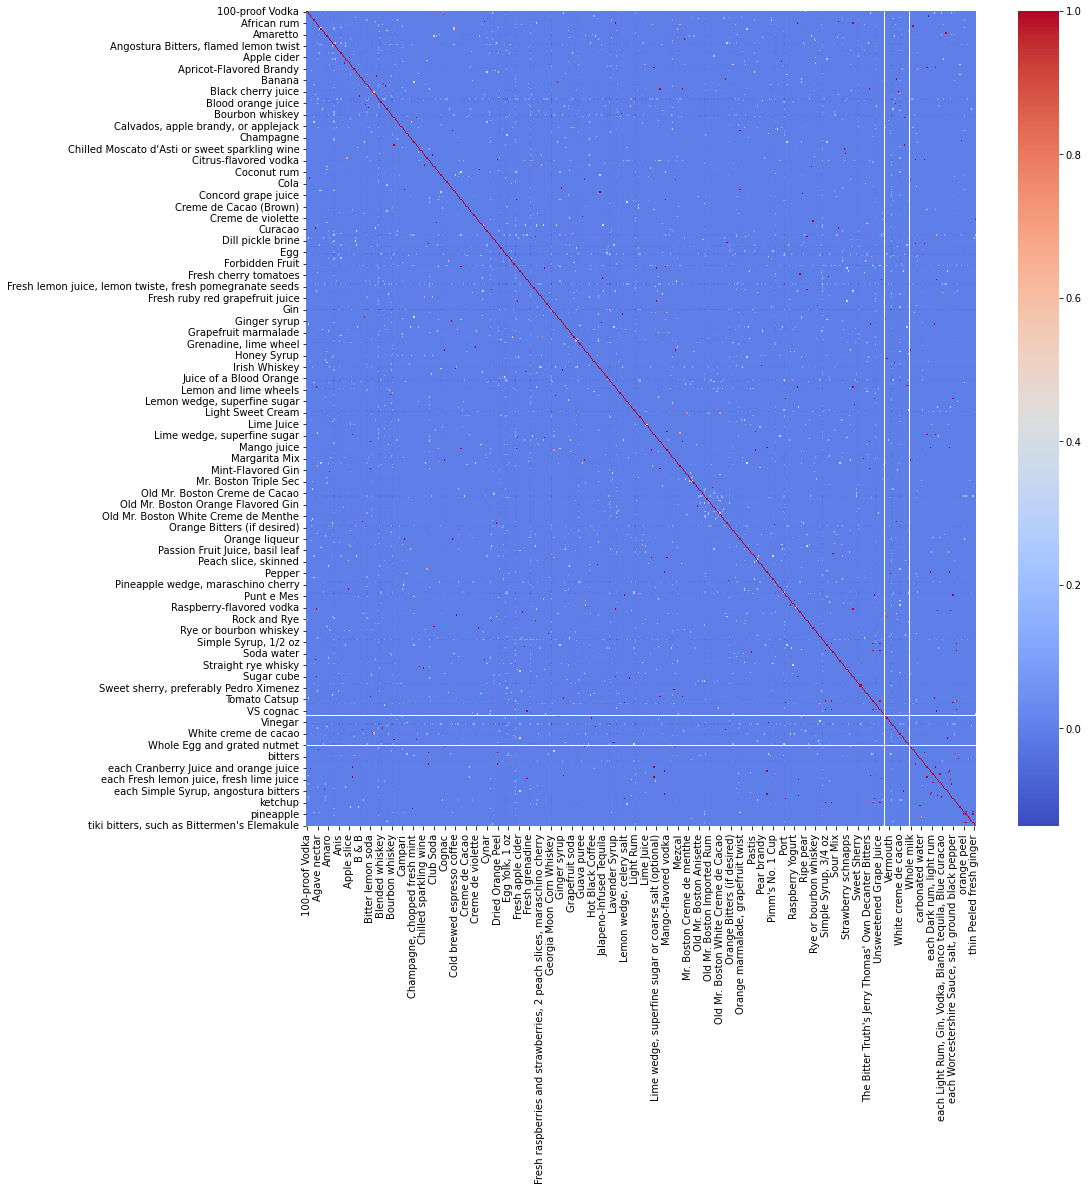

In [21]:
# Calculate the correlation matrix
corr_matrix = dummies.corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 15))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')

# Show the plot
plt.show()

In [22]:
valueCounts = df['ingredient'].value_counts()
valueCounts

Gin                                       176
Fresh lemon juice                         138
Simple Syrup                              115
Vodka                                     114
Light Rum                                 113
                                         ... 
Lemon or Orange Sherbet                     1
Wide spiral of lemon zest                   1
Sparkling wine, raspberry and cucumber      1
Acai berry flavored vodka                   1
Apple Flavored Brandy                       1
Name: ingredient, Length: 569, dtype: int64

In [29]:
df['name'].value_counts()

Ibiza                      6
Tahitian Tea               6
Ramos Fizz                 6
Red Swizzle                6
Lights On The Plaza        6
                          ..
London Special Cocktail    1
Bucks Fizz (Mimosa)        1
Zero Mint                  1
Purple Twister             1
Hill Billy Highball        1
Name: name, Length: 989, dtype: int64

In [32]:
# Get the value counts
drink_counts = df['name'].value_counts()

# Filter to get only those drinks that appear once
single_occurrence_drinks = drink_counts[drink_counts == 1]

# Get the names of these drinks
drink_names_with_single_occurrence = single_occurrence_drinks.index.tolist()
drink_names_with_single_occurrence

['Orange Gin Highball',
 'Sherry-and-Egg Cocktail',
 'Rum Highball',
 'Royal Purple Punch',
 'Passion Mimosa',
 'Saronno Mist',
 'Cherry Cooler',
 'Bourbon Highball',
 'Monkey Wrench',
 'Mandarine Mist',
 'Paloma',
 'Bourbon On The Rocks',
 'Limestone',
 'Vodka and Apple Juice',
 'Vodka and Tonic',
 'Brandy and Soda',
 'Spritzer Highball',
 'Cafe di Saronno',
 'Lime Giant',
 'Cognac Highball',
 'Bucks Fizz',
 'Dubonnet Highball',
 'Tchoupitolas Street Guzzle',
 'T.N.T. Cocktail No. 2',
 'Scotch Whisky Highball',
 'Tropical Heart',
 'London Special Cocktail',
 'Bucks Fizz (Mimosa)',
 'Zero Mint',
 'Purple Twister',
 'Hill Billy Highball']